# Explore the prepared data to gather insights

## Outline
   
- **Check target class distribution** 
    - in the whole dataset
    - by click
    - by purchase
- **Check for pattern in the data**
    - Hourly
    - weekly
- **Impact of features**

## Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from datetime import timedelta
from scripts.utils import save_list_as_text_file
from scripts.utils import create_directory
from scripts.visualization import plot_feature_distributions
from scripts.visualization import without_hue

save_folder = r"plots/EDA"
create_directory(save_folder)

In [3]:
full_data = pd.read_csv(r"data/prepared_data_for_modeling.csv")
full_data['datetime'] = pd.to_datetime(full_data['datetime'])
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23485 entries, 0 to 23484
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   datetime                    23485 non-null  datetime64[ns]
 1   campaign_id                 23485 non-null  int64         
 2   spend                       23485 non-null  float64       
 3   impressions                 23485 non-null  float64       
 4   clicks                      23485 non-null  float64       
 5   purchase                    23485 non-null  float64       
 6   hour                        23485 non-null  int64         
 7   unique_ids                  23485 non-null  object        
 8   first_24_hour               23485 non-null  bool          
 9   test_set                    23485 non-null  bool          
 10  ctr                         23485 non-null  float64       
 11  conversion_rate             23485 non-null  float64   

## Check target class distribution

### In the whole dataset

In [3]:
# def without_hue(plot:object, feature:list) -> None:
#     '''
#     Given a plot object containing bar this methods prints %
#     on top of each bar.
#     '''
#     total = len(feature)
#     for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#         x = p.get_x() + p.get_width() / 2 - 0.05
#         y = p.get_y() + p.get_height()
#         ax.annotate(percentage, (x, y), size = 12)

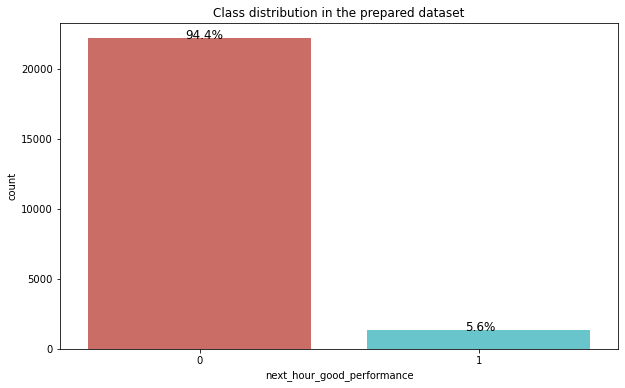

In [5]:
save_folder = r"plots/EDA"

plt.figure(figsize=(10,6))
ax = sns.countplot(x='next_hour_good_performance', data=full_data, palette='hls')
plt.title('Class distribution in the prepared dataset')
without_hue(ax, full_data.next_hour_good_performance)
create_directory(save_folder)
plt.savefig( f"{save_folder}{os.sep}"+'class_distribution.jpg', dpi=300, bbox_inches = "tight")
plt.show();

extract boolean clicked and purchase value

In [117]:
full_data['clicked'] = full_data['clicks']>0
full_data['purchased'] = full_data['purchase']>0

Check how they are distributed with nexthour performance

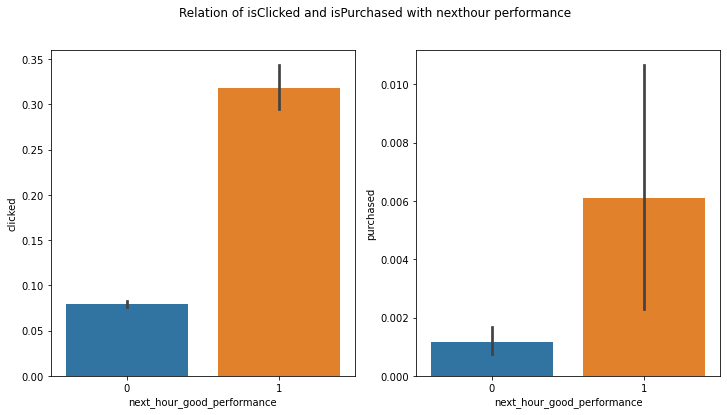

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(y='clicked', x='next_hour_good_performance', data=full_data, ax=axes[0])
sns.barplot(y='purchased', x='next_hour_good_performance', data=full_data, ax=axes[1])
fig.suptitle('Relation of isClicked and isPurchased with nexthour performance')
plt.savefig( f"{save_folder}{os.sep}"+'class_distribution_with_click_and_purchase.jpg', dpi=300, bbox_inches = "tight")

-> Observation: Nothing unusual

## Check for pattern in the data

#### Hourly Pattern

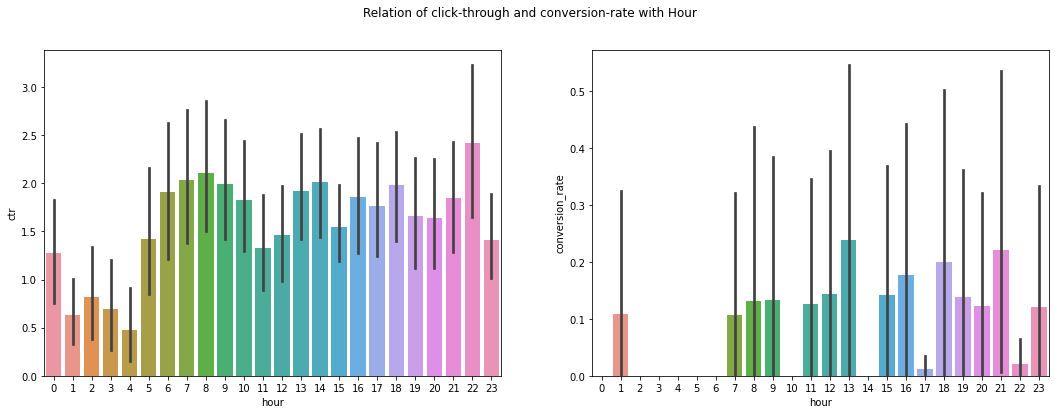

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(y='ctr', x='hour', data=full_data, ax=axes[0])
sns.barplot(y='conversion_rate', x='hour', data=full_data, ax=axes[1])

fig.suptitle('Relation of click-through and conversion-rate with Hour')
fig.savefig( f"{save_folder}{os.sep}"+'hourly_ctr_cr_pattern.jpg', dpi=300, bbox_inches = "tight")

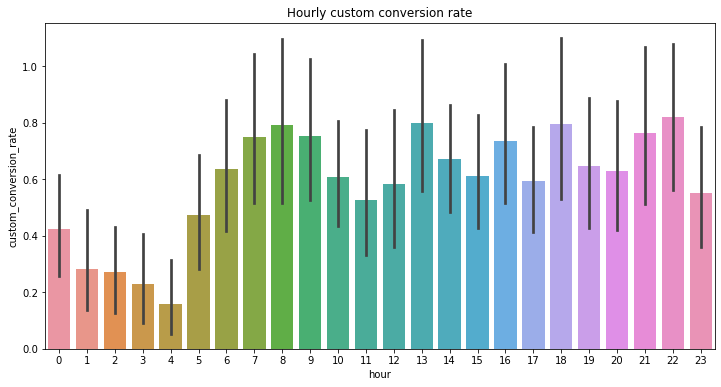

In [120]:
plt.figure(figsize=(12,6))
sns.barplot(y='custom_conversion_rate', x='hour', data=full_data)
plt.title('Hourly custom conversion rate');
plt.savefig( f"{save_folder}{os.sep}"+'hourly_custom_cr_pattern.jpg', dpi=300, bbox_inches = "tight")

In [121]:
full_data.groupby('hour').custom_conversion_rate.mean()

hour
0     0.424071
1     0.282538
2     0.272094
3     0.230496
4     0.159957
5     0.474426
6     0.637438
7     0.749894
8     0.790620
9     0.754185
10    0.608527
11    0.525541
12    0.583054
13    0.797892
14    0.670979
15    0.610230
16    0.736527
17    0.595112
18    0.796239
19    0.645685
20    0.629267
21    0.761872
22    0.818906
23    0.551810
Name: custom_conversion_rate, dtype: float64

-> Observation: Hourly pattern spotted as conversion rate is high on 8, 13, 16, 22

### Day Of Week

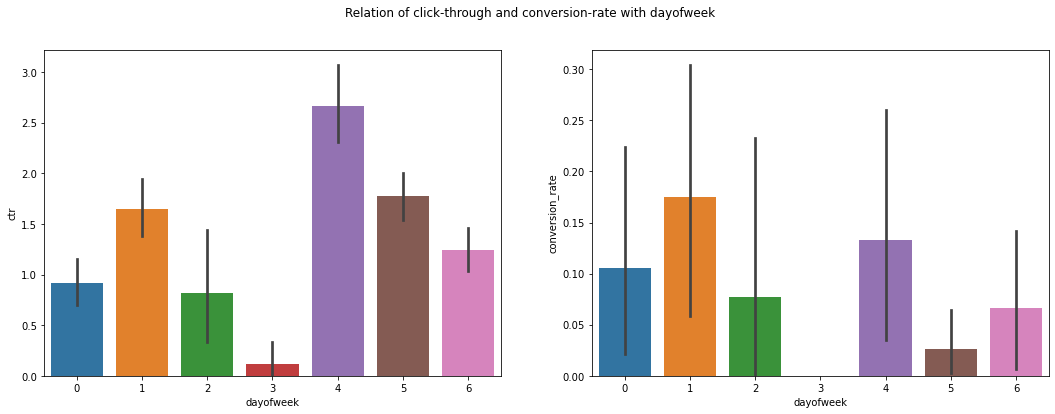

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(y='ctr', x='dayofweek', data=full_data, ax=axes[0])
sns.barplot(y='conversion_rate', x='dayofweek', data=full_data, ax=axes[1])

fig.suptitle('Relation of click-through and conversion-rate with dayofweek')
fig.savefig( f"{save_folder}{os.sep}"+'day_of_week_ctr_cr_pattern.jpg', dpi=300, bbox_inches = "tight")

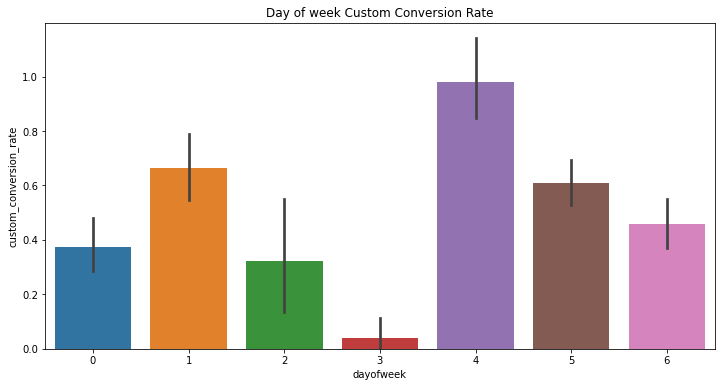

In [123]:
plt.figure(figsize=(12,6))
sns.barplot(y='custom_conversion_rate', x='dayofweek', data=full_data)
plt.title('Day of week Custom Conversion Rate');
plt.savefig( f"{save_folder}{os.sep}"+'day_of_week_custom_cr_pattern.jpg', dpi=300, bbox_inches = "tight")

-> Observation Desired conversion happens mostly on Friday

### Impact of features

#### Impact of campaign ID

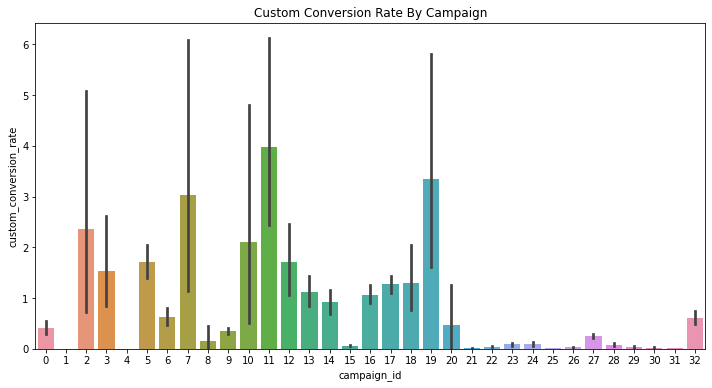

In [140]:
plt.figure(figsize=(12,6))
ax = sns.barplot(y='custom_conversion_rate', x='campaign_id', data=full_data)
plt.title('Custom Conversion Rate By Campaign');
plt.savefig( f"{save_folder}{os.sep}"+'impact_of_campaign_id.jpg', dpi=300, bbox_inches = "tight")

#### Relationships
Exclude invalid features that doesn't account for relationship with target variable

In [3]:
exclude_features = ['datetime', 'unique_ids', 'first_24_hour', 'test_set', 'clicked', 'purchased']

valid_columns = list(set(full_data.columns)-set(exclude_features))
valid_columns

['impressions',
 'clicks',
 'purchase',
 'hour',
 'spend',
 'ctr',
 'good_performance',
 'conversion_rate',
 'custom_conversion_rate',
 'campaign_id',
 'dayofweek',
 'next_hour_good_performance']

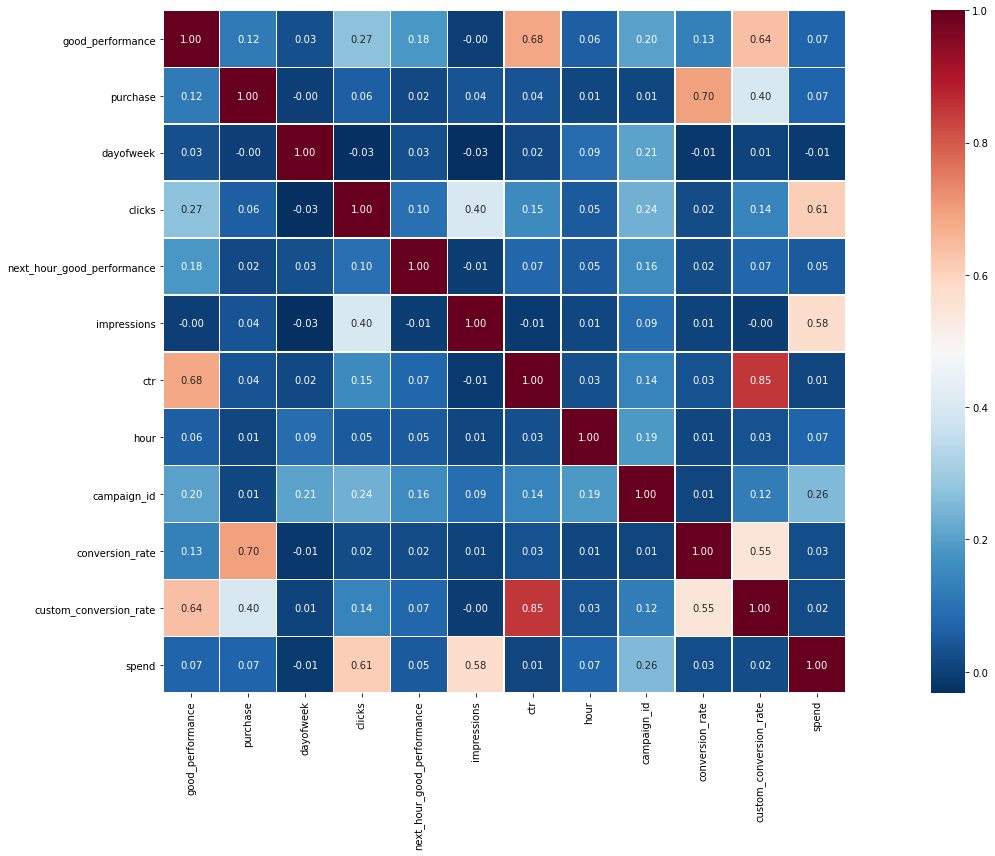

In [5]:
plt.figure(figsize=(24,12))
sns.heatmap(full_data[valid_columns]._get_numeric_data().astype(float).corr(),
            square=True, 
            cmap='RdBu_r', 
            linewidths=.5,
            annot=True, 
            fmt='.2f').figure.tight_layout()
plt.show()

**observation-> very high correlation of ctr with custom_conversion_rate and good performance. Let's drop it**

In [4]:
sample_features = ['campaign_id', 'hour', 'dayofweek','spend', 'purchase', 
                   'impressions', 'conversion_rate', 'clicks',
                   'custom_conversion_rate','good_performance',
                   'next_hour_good_performance']

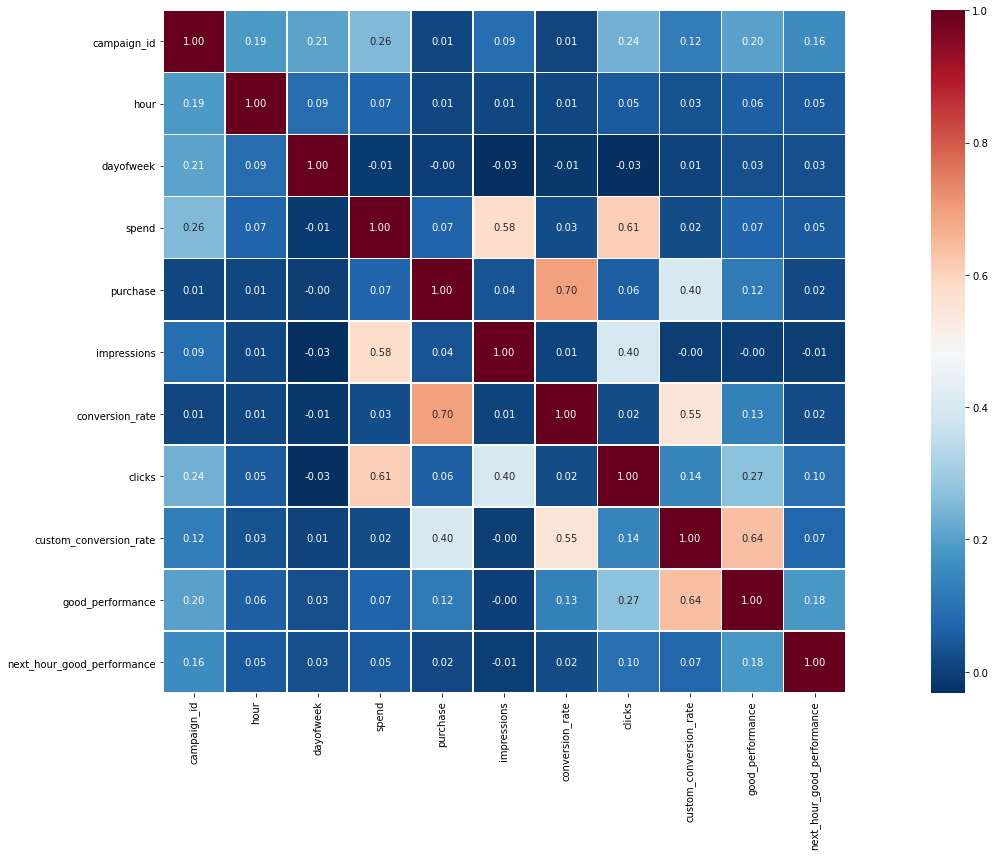

In [5]:
plt.figure(figsize=(24,12))
sns.heatmap(full_data[sample_features]._get_numeric_data().astype(float).corr(),
            square=True, 
            cmap='RdBu_r', 
            linewidths=.5,
            annot=True, 
            fmt='.2f').figure.tight_layout()
plt.savefig( f"{save_folder}{os.sep}"+'selected_feature_correlation_matrix.jpg', dpi=300, bbox_inches = "tight")
plt.show()

### Plot feature distributions among target

##### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.
Observation:
For all the features, both good and bad performed ads have acceptable distributions


convert boolean data type to int

In [5]:
full_data["next_hour_good_performance"] = full_data["next_hour_good_performance"].astype(int)
full_data["good_performance"] = full_data["good_performance"].astype(int)

F:\miniconda3\envs\lfi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\miniconda3\envs\lfi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\miniconda3\envs\lfi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

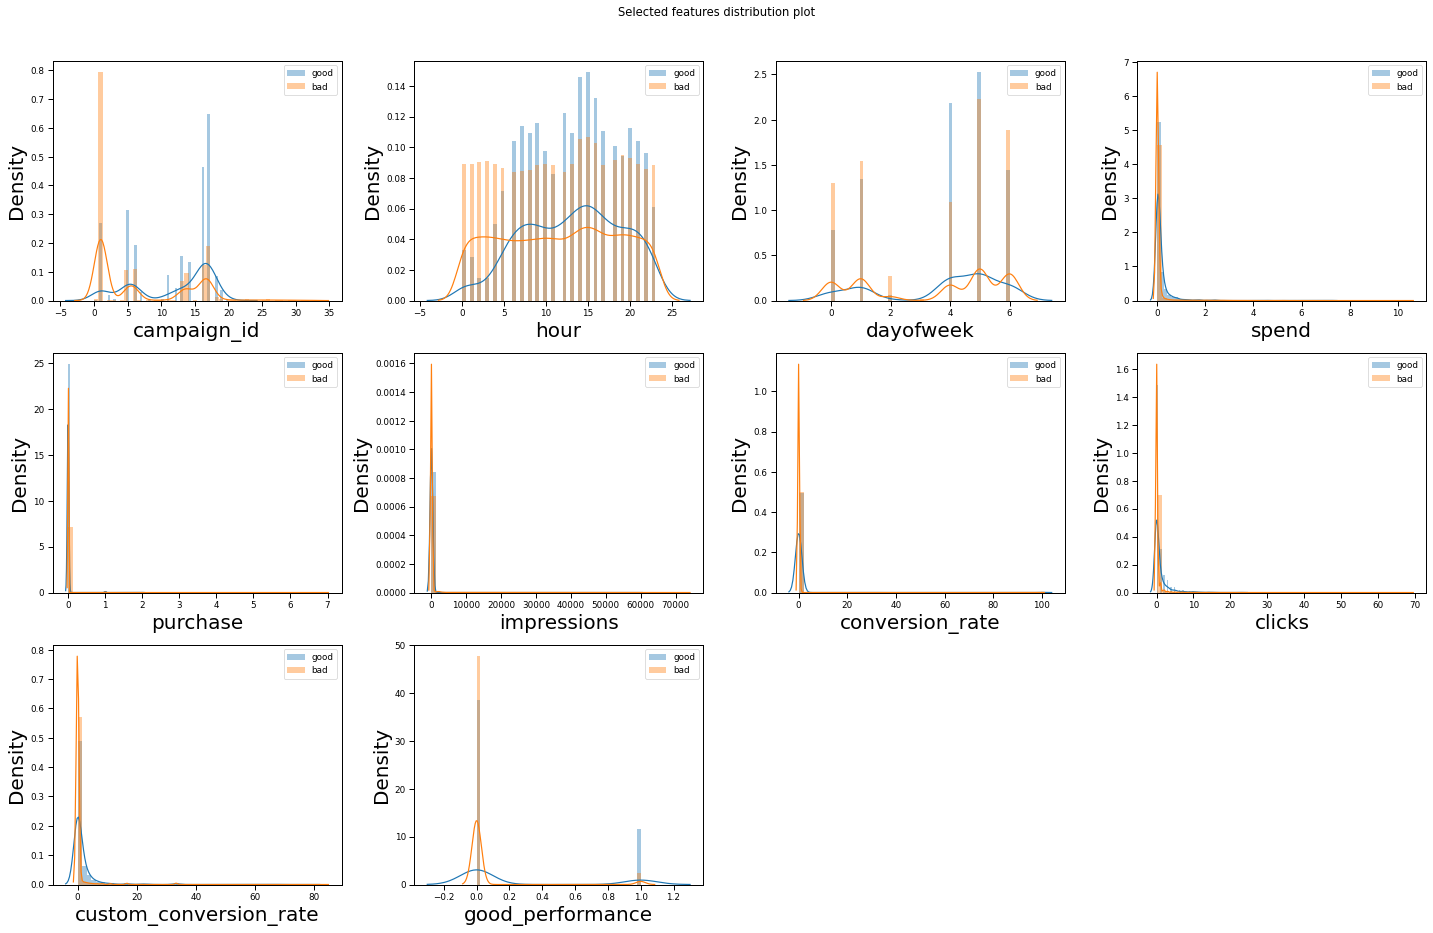

In [6]:
plot_feature_distributions(sample_features, full_data, 'next_hour_good_performance', save_folder=save_folder)

## Save selected features info for Modeling

In [7]:
save_list_as_text_file("data/feature_lists_fosadasr_modeling.txt", sample_features)

List saved in:  data/feature_lists_fosadasr_modeling.txt
